In [113]:
import numpy as np
import pandas as pd

In [114]:
df = pd.read_csv('forestfires.csv')  

In [115]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [116]:
df.shape

(517, 13)

In [117]:
mv=df.isnull().sum()
print(mv)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [118]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [119]:
df_cat=df.select_dtypes(np.object)
df_num=df.select_dtypes(np.number)

C:\Users\Iqra\AppData\Local\Temp\ipykernel_18628\2628512907.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat=df.select_dtypes(np.object)


In [120]:
df_cat

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


In [121]:
df_num

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [122]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for column in ['month','day' ]:
    df[column] = label_encoder.fit_transform(df[column])

In [123]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

X          int64
Y          int64
month      int32
day        int32
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [124]:
from sklearn.preprocessing import StandardScaler

# For example, if you want to standardize columns 'A' and 'B':
columns_to_standardize = ['X','Y','month','day','FFMC','DMC','DC','ISI', 'temp','RH','wind','rain','area']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
print(df)

            X         Y     month       day      FFMC       DMC        DC  \
0    1.008313  0.569860  0.284222 -1.423121 -0.805959 -1.323326 -1.830477   
1    1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
2    1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
3    1.440925  1.383722  0.284222 -1.423121  0.191362 -1.212361 -1.898266   
4    1.440925  1.383722  0.284222  0.136781 -0.243833 -0.931043 -1.798600   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289524 -1.057862 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
513 -1.154748 -0.244001 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
514  1.008313 -0.244001 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
515 -1.587360 -0.244001 -1.089076 -0.383187  0.680957  0.549003  0.269382   
516  0.575701 -1.057862  0.741988  1.176715 -2.020879 -1.685913 -1.780442   

          ISI      temp        RH      wind      rain      area  
0   -0.86

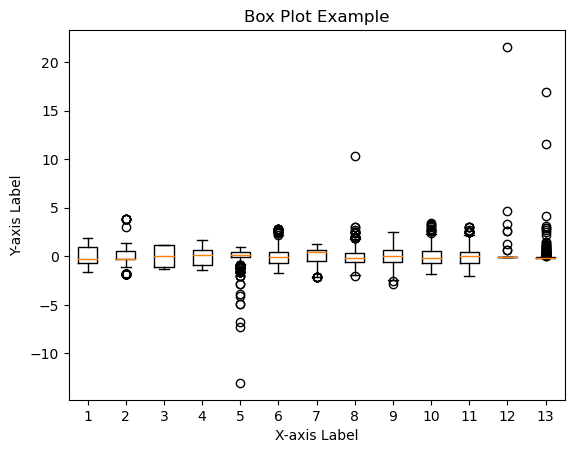

In [125]:
import matplotlib.pyplot as plt


# Create a box plot
plt.boxplot(df)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [126]:
# Define a function to identify and remove outliers
def remove_outliers(df, threshold=1.5):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    return df[(df >= lower_bound) & (df <= upper_bound)]


# Remove outliers
cleaned_data = remove_outliers(df)

print("Original Data:", df)
print("Cleaned Data:", cleaned_data)

Original Data:             X         Y     month       day      FFMC       DMC        DC  \
0    1.008313  0.569860  0.284222 -1.423121 -0.805959 -1.323326 -1.830477   
1    1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
2    1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
3    1.440925  1.383722  0.284222 -1.423121  0.191362 -1.212361 -1.898266   
4    1.440925  1.383722  0.284222  0.136781 -0.243833 -0.931043 -1.798600   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289524 -1.057862 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
513 -1.154748 -0.244001 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
514  1.008313 -0.244001 -1.089076  0.136781 -1.640083 -0.846648  0.474768   
515 -1.587360 -0.244001 -1.089076 -0.383187  0.680957  0.549003  0.269382   
516  0.575701 -1.057862  0.741988  1.176715 -2.020879 -1.685913 -1.780442   

          ISI      temp        RH      wind      rain      a

In [127]:
cleaned_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,1.008313,-0.244001,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,1.008313,-0.244001,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,1.440925,1.383722,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,NaN,-0.009834,0.603155,-0.20202
4,1.440925,1.383722,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,NaN,-1.238940,-0.073268,-0.20202


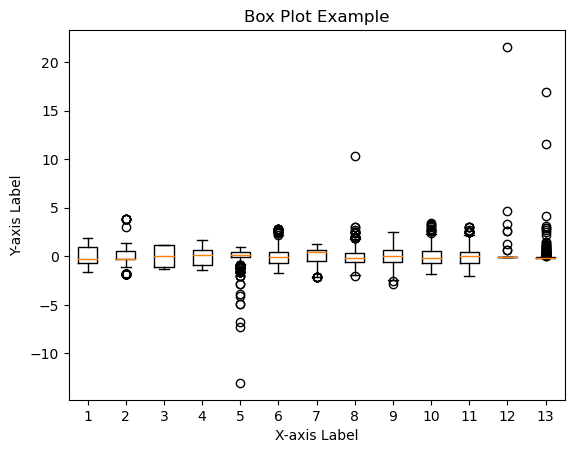

In [128]:
import matplotlib.pyplot as plt


# Create a box plot
plt.boxplot(df)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df[['X']], 
    df['Y'],
    test_size=0.2,
    random_state=42
)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 0.32216015,  0.54925055,  0.77634095,  0.09506976, -0.58620143,
       -0.13202064,  0.09506976, -0.13202064, -0.81329183, -0.58620143,
       -0.58620143,  0.54925055,  0.54925055, -0.81329183,  0.54925055,
        0.32216015, -0.81329183,  0.32216015,  0.77634095, -0.58620143,
       -0.13202064,  0.77634095,  0.32216015,  0.32216015, -0.35911104,
        0.77634095,  1.00343134,  0.77634095,  0.32216015, -0.35911104,
       -0.58620143,  0.54925055, -0.58620143,  0.54925055,  0.09506976,
        1.00343134, -0.13202064, -0.13202064,  0.09506976, -0.58620143,
        0.77634095, -0.58620143,  0.54925055, -0.13202064, -0.58620143,
        0.77634095, -0.81329183,  0.32216015, -0.13202064, -0.13202064,
        0.32216015,  0.32216015,  0.09506976, -0.58620143, -0.13202064,
       -0.13202064,  0.54925055,  0.54925055,  0.77634095, -0.35911104,
       -0.35911104, -0.58620143,  0.54925055, -0.81329183, -0.35911104,
        0.32216015,  0.32216015,  0.77634095,  0.77634095,  0.54

In [132]:
# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')


Mean Squared Error: 0.7671536520878822


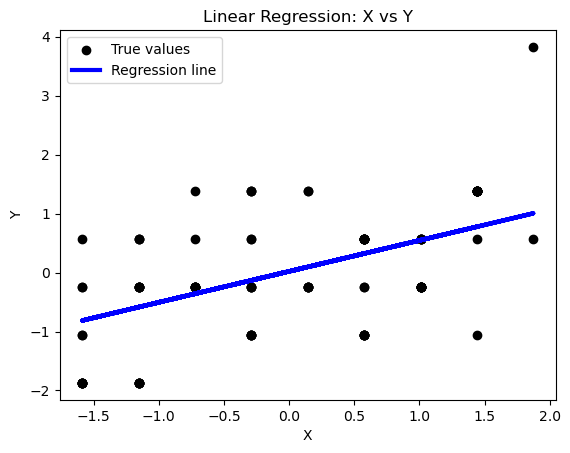

In [133]:
# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression: X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [134]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 0.7123790511101743
R-squared: 0.32080736469052307
